# 設定

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Rosenblatt によるパーセプトロン

In [0]:
class Perceptron(object):
  """パーセプトロンの分類器
  
  :param eta: float, 学習率
  :param n_iter: int, トレーニングの回数

  :param w_: 1次元の配列, 重み
  :param errors_: リスト, 各エポックでの誤分類数
  """
  def __init__(self, eta=0.01, n_iter=10):
    self.eta = eta
    self.n_iter = n_iter
  
  def fit(self, X, y):
    """トレーニング。訓練データに適用させる。
    
    :param X: 配列, shape=[n_samples, n_features], 訓練データ
    :param y: 配列, shape=[n_samples], 目的変数(正解)

    :return self: 学習済みモデル
    """
    # w0 + w0X1 + ... なので、w0 を考慮して1つ多く配列を作成
    self.w_ = np.zeros(1 + X.shape[1])
    self.errors_ = []

    for epoch in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        # w0 以外を更新(x0 が存在しないので)
        self.w_[1:] += update * xi
        # w0 (バイアス) を更新
        self.w_[0] += update
        # 重みが更新された場合、誤分類数を増やす
        if update != 0.0:
          errors += 1
      # エポックごとの誤差を配列に格納する
      self.errors_.append(errors)
    return self
  
  def net_input(self, X):
    """総入力を計算(総入力関数)
    """
    return np.dot(X, self.w_[1:]) + self.w_[0]
  
  def predict(self, X):
    """1 または -1 の予測ラベルを返す(活性化関数)
    """
    return np.where(self.net_input(X) >= 0.0, 1, -1)


In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

URLError: ignored

In [0]:
# iris dataset は教科書通りのコードではダウンロードできない
# sklearn.datasets に存在している
from sklearn.datasets import load_iris
iris = load_iris()

In [0]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Iris_setosa: 0, Iris_versicolor: 1, Iris_virginica: 2 で置き換えられている
df['target'] = iris.target
df.loc[df['target'] == 0, 'target'] = "Iris_setosa"
df.loc[df['target'] == 1, 'target'] = "Iris_versicolor"
df.loc[df['target'] == 2, 'target'] = "Iris_virginica"
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,Iris_virginica
146,6.3,2.5,5.0,1.9,Iris_virginica
147,6.5,3.0,5.2,2.0,Iris_virginica
148,6.2,3.4,5.4,2.3,Iris_virginica
149,5.9,3.0,5.1,1.8,Iris_virginica


# 2値分類  
特徴量
* がく片の長さ(sepal length)
* 花びらの長さ(petal length)

正解
* setosa: -1
* versicolor: 1

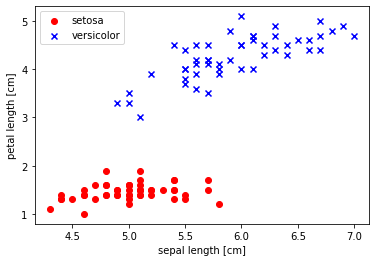

In [0]:
# 先頭1-100行目の目的変数の抽出
y = df.iloc[0:100, 4].values
# Iris_setosa: -1, それ以外(versicolor): 1
y = np.where(y=='Iris_setosa', -1, 1)

# がく片の長さ(sepal length) と 花びらの長さ(petal length) を抽出
X = df.iloc[0:100, [0, 2]].values

# 品種 setosa のプロット
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
# 品種　versicolor のプロット
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
# 軸ラベルの設定
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
# 凡例の設定(左上)
plt.legend(loc='upper left')
# 図の表示
plt.show()

# 訓練

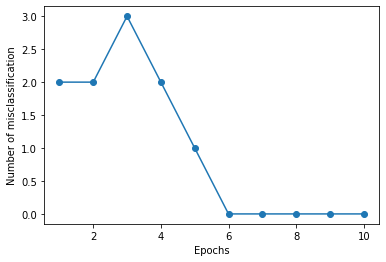

In [0]:
# パーセプトロンのオブジェクトの生成(インスタンス化)
ppn = Perceptron(eta=0.1, n_iter=10)
# 訓練データにモデルを適合させる
ppn.fit(X, y)
# エポックと誤分類数のプロット
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
# 軸ラベルの設定
plt.xlabel('Epochs')
plt.ylabel('Number of misclassification')
# 図の表示
plt.show()

# 決定境界の可視化

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  """決定境界を可視化する
  """
  # マーカーの準備
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 決定領域
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  # グリッドポイントの生成
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
  # 学習済みの分類器(classifier)で予測を実行
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  # 等高線のプロット
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  # 軸の範囲の設定
  plt.xlim = (xx1.min(), xx1.max())
  plt.ylim = (xx2.min(), xx2.max())

  # クラスごとにプロット
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                alpha=0.8, c=cmap(idx),
                edgecolor='black',
                marker=markers[idx],
                label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


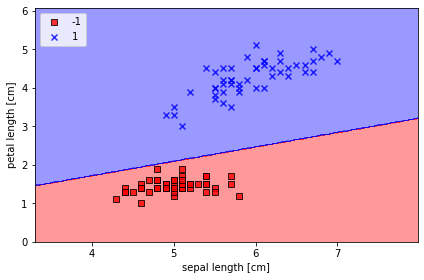

In [0]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# ADALINE
Rosenblatt のパーセプトロン + 活性化関数

In [0]:
class AdalineGD(object):
  """ADAptive LIner NEuron (ADALINE)

  :param eta: float, 学習率
  :param n_iter: int, トレーニングの回数

  :param w_: 1次元の配列, 重み
  :param cost_: リスト, 各エポックでの2乗誤差
  """
  def __init__(self, eta=0.01, n_iter=50):
    self.eta = eta
    self.n_iter = n_iter
  
  def fit(self, X, y):
    """基本的には Rosenblatt によるパーセプトロンと同じ

    :param X: 配列, shape=[n_samples, n_features], 訓練データ
    :param y: 配列, shape=[n_samples], 目的変数(正解)

    :return self: 学習済みモデル
    """
    self.w_ = np.zeros(1 + X.shape[1])
    self.cost_ = []

    for epoch in range(self.n_iter):
      output = self.activation(X)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self
  
  def net_input(self, X):
    """特徴量と重みから計算
    """
    return np.dot(X, self.w_[1:]) + self.w_[0]
  
  def activation(self, X):
    """ここでは線形。tanh(X) や relu(X)　などもある。
    """
    return self.net_input(X)
  
  def predict(self, X):
    """分類ラベルを生成
    """
    return np.where(self.activation(X) >= 0.0, 1, -1)

# 2つの学習率(eta)を用いて学習過程を描画
* eta=0.01
* eta=0.0001

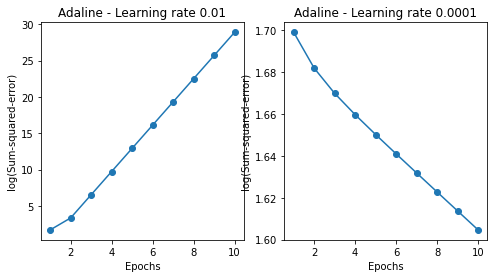

In [0]:
# 描画領域を１行2列に分解
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# 勾配降下法による ADALINE の学習(学習率 eta=0.01)
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
# エポックごとのコストをプロット
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
# 軸ラベルの設定
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
# タイトル
ax[0].set_title('Adaline - Learning rate 0.01')

# 勾配降下法による ADALINE の学習(学習率 eta=0.0001)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
# エポックごとのコストをプロット
ax[1].plot(range(1, len(ada2.cost_)+1), np.log10(ada2.cost_), marker='o')
# 軸ラベルの設定
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
# タイトル
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

# 特徴量のスケーリング
* 標準化 (normalization)

In [0]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [0]:
# 悪い結果となった学習率(eta=0.01)でもう一度学習する
ada = AdalineGD(n_iter=15, eta=0.01).fit(X_std, y)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


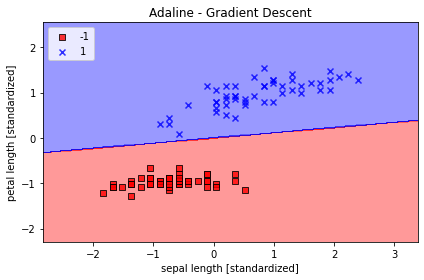

In [0]:
#　決定境界のプロット
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

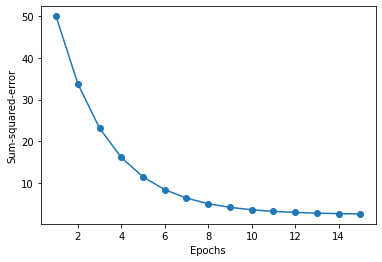

In [0]:
# エポックとコストの関係をプロット
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

# 確率的勾配降下法の導入
* これまで AdalineGD: 勾配降下法
* 今回 Adaline**SGD**: **確率的**勾配降下法

In [0]:
from numpy.random import seed

class AdalineSGD(object):
  """ADALINE の重み更新に SGD を用いる
  """
  def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    if random_state:
      seed(random_state)
    
  def fit(self, X, y):
    """これまでと同様。SGD で更新する点が異なる。
    """
    self._initialize_weights(X.shape[1])
    self.cost_ = []

    for epoch in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)
      cost = []
      for xi, target in zip(X, y):
        cost.append(self._update_weights(xi, target))
      avg_cost = sum(cost) / len(y)
      self.cost_.append(avg_cost)
    return self
  
  def partial_fit(self, X, y):
    """重みを初期化せずに訓練データに適合
    """
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
    # 教師データの要素数に応じて重み更新方法を変化
    if y.ravel().shape[0] > 1:
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    else:
      self._update_weights(X, y)
    return self
  
  def _shuffle(self, X, y):
    """訓練データをシャッフルする
    """
    r = np.random.permutation(len(y))
    return X[r], y[r]
  
  def _initialize_weights(self, m):
    """重みを 0　に初期化

    :param m: 次元数
    """
    # w0 + w1X1 + ...　なので、w0 を考慮
    self.w_ = np.zeros(1 + m)
    self.w_initialized = True
  
  def _update_weights(self, xi, target):
    """重みを更新

    :return cost: 二乗誤差
    """
    output = self.net_input(xi)
    error = (target - output)
    self.w_[1:] += self.eta * xi.dot(error)
    self.w_[0] += self.eta * error
    cost = 0.5 * error**2
    return cost
  
  def net_input(self, X):
    """総入力を計算
    """
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    """活性化関数の出力。今回も線形。
    """
    return self.net_input(X)
  
  def predict(self, X):
    """1エポックごとにラベルを予測
    """
    return np.where(self.activation(X) >= 0.0, 1, -1)

In [0]:
# AdalineGD　と同じ設定で実験
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1).fit(X_std, y)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


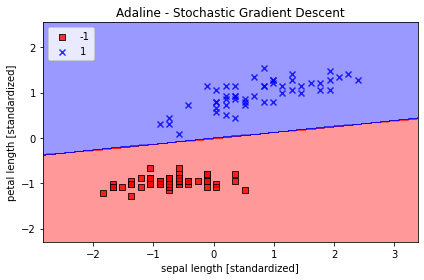

In [0]:
# 決定境界のプロット
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

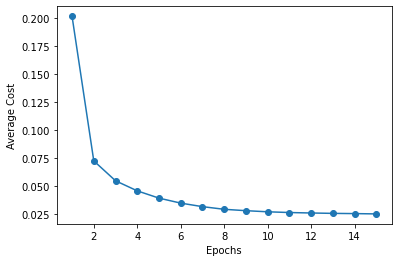

In [0]:
# エポックとコストの関係をプロット
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()